In [1]:
import os
import sys
import requests as req
import json

from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

new_path = os.getcwd().replace('/notebooks', '')
print(f'Adding {new_path} to sys.path')

if new_path not in sys.path:
    sys.path.append(new_path)

# Local imports
from curvemetrics.src.classes.datahandler import DataHandler
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.metricsprocessor import MetricsProcessor

Adding /root/curve-lp-metrics to sys.path


In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 10})

In [4]:
datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()

pool = "0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7" # 3pool

start_ts, start_block = DataFetcher.get_block(datetime.fromisoformat("2023-03-01"))
end_ts, end_block = DataFetcher.get_block(datetime.fromisoformat("2023-03-15"))

In [5]:
async def get_snapshots():
    datafetcher = DataFetcher(token_metadata=token_metadata)
    try:
        snapshots = datafetcher.get_snapshots(start_ts, end_ts, pool)
    except Exception as e:
        print(f'excepted: {e}')
        return 
    finally:
        await datafetcher.close()
    return snapshots
    
snapshots = await get_snapshots()

In [6]:
df = pd.DataFrame.from_dict([x for y in snapshots for x in y])
for col in ['A', 'offPegFeeMultiplier', 'timestamp', 'virtualPrice', 'lastPricesTimestamp', 'block_gte', 'block_lt']:
    df[col] = df[col].astype(int)
for col in ['adminFee', 'fee', 'lpPriceUSD', 'tvl', 'totalDailyFeesUSD', 'lpFeesUSD']:
    df[col] = df[col].astype(float)
for col in ['normalizedReserves', 'reserves']:
    df[col] = df[col].apply(lambda x: [int(y) for y in x])
for col in ['reservesUSD']:
    df[col] = df[col].apply(lambda x: [float(y) for y in x])
df = df.sort_values(by='timestamp')
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

,A,adminFee,fee,id,normalizedReserves,offPegFeeMultiplier,reserves,timestamp,virtualPrice,lpPriceUSD,tvl,totalDailyFeesUSD,reservesUSD,lpFeesUSD,lastPricesTimestamp,lastPrices,pool_id,block_gte,block_lt
timestamp,,,,,,,,,,,,,,,,,,,
2023-03-02,2000,0.0,0.0001,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7-167...,"[179429170997200221568071825, 2002791805715730...",0,"[179429170997200221568071825, 200279180571573,...",1677715200,1023916244853043458,1.023836,5.235648e+08,0.0,"[179416266.8379862, 200248747.31400058, 143899...",0.0,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1677628811,1677715211
2023-03-03,2000,0.0,0.0001,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7-167...,"[194912144489662697672370254, 2012732095960730...",0,"[194912144489662697672370254, 201273209596073,...",1677801600,1023930472585875962,1.023862,5.336983e+08,0.0,"[194895790.63500613, 201249856.0714686, 137552...",0.0,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1677715211,1677801611
2023-03-04,2000,0.0,0.0001,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7-167...,"[186887447046863360535264177, 1747432348209210...",0,"[186887447046863360535264177, 174743234820921,...",1677888000,1023941751476752322,1.023882,5.326450e+08,0.0,"[186867415.92647466, 174731750.43461752, 17104...",0.0,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1677801611,1677888011
2023-03-05,2000,0.0,0.0001,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7-167...,"[185997195015735016604982389, 1814605206967190...",0,"[185997195015735016604982389, 181460520696719,...",1677974400,1023943021781922435,1.023874,5.383322e+08,0.0,"[185976482.99518567, 181444551.97603002, 17091...",0.0,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1677888011,1677974411
2023-03-06,2000,0.0,0.0001,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7-167...,"[185593551162490308342848042, 1850614092206730...",0,"[185593551162490308342848042, 185061409220673,...",1678060800,1023945631217088321,1.023876,5.412547e+08,0.0,"[185574731.60892665, 185043164.85478356, 17063...",0.0,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1677974411,1678060811


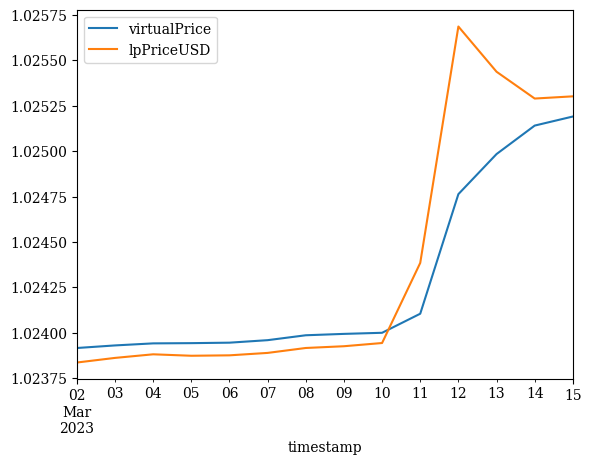

In [10]:
(df['virtualPrice']/10**18).plot(label='virtualPrice')
df['lpPriceUSD'].plot(label='lpPriceUSD')
plt.legend()